# Budowa eigenfaces w oparciu o zbiór danych LFW

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Ładowanie danych

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=50)

Wyświetlmy część zaimportowanych danych

In [3]:
def display_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    
def display_gallery(images, titles, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
    plt.show()

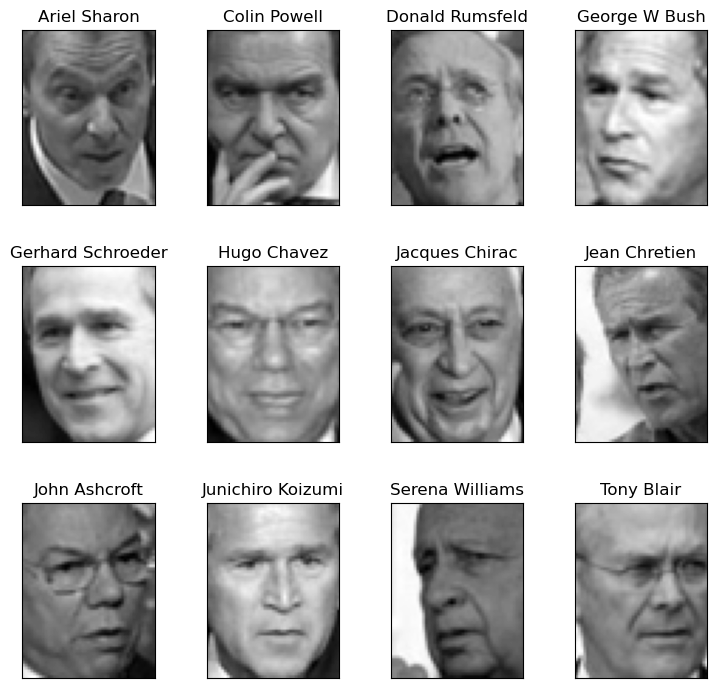

In [4]:
display_gallery(lfw_people.images, lfw_people.target_names)

## Podział na zbiór treningowy i testowy

In [5]:
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=42)

## PCA

### Trening PCA na zbiorze treningowym

In [6]:
pca = PCA(n_components=100).fit(X_train)

### Redukcja wymiarowości dla zbioru treningowego i testowego

In [7]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Klasyfikacja

### Dla 100 komponentów

#### MLP

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128), max_iter=1000, random_state=42)
mlp.fit(X_train_pca, y_train)

y_pred_mlp = mlp.predict(X_test_pca)
report_mlp = classification_report(y_test, y_pred_mlp, target_names=lfw_people.target_names)

print(report_mlp)

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.69      0.69        16
     Colin Powell       0.94      0.92      0.93        66
  Donald Rumsfeld       0.70      0.70      0.70        27
    George W Bush       0.90      0.86      0.88       140
Gerhard Schroeder       0.58      0.62      0.60        24
      Hugo Chavez       0.80      0.71      0.75        17
   Jacques Chirac       0.67      0.40      0.50        10
    Jean Chretien       0.75      0.86      0.80        14
    John Ashcroft       0.70      0.88      0.78        16
Junichiro Koizumi       0.85      1.00      0.92        11
  Serena Williams       0.78      0.78      0.78         9
       Tony Blair       0.76      0.80      0.78        40

         accuracy                           0.82       390
        macro avg       0.76      0.77      0.76       390
     weighted avg       0.82      0.82      0.82       390



#### SVM

In [9]:
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train_pca, y_train)

y_pred_svm = svm.predict(X_test_pca)
report_svm = classification_report(y_test, y_pred_svm, target_names=lfw_people.target_names)

print(report_svm)

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.81      0.70        16
     Colin Powell       0.81      0.85      0.83        66
  Donald Rumsfeld       0.59      0.70      0.64        27
    George W Bush       0.89      0.75      0.81       140
Gerhard Schroeder       0.56      0.58      0.57        24
      Hugo Chavez       0.73      0.65      0.69        17
   Jacques Chirac       0.67      0.60      0.63        10
    Jean Chretien       1.00      0.79      0.88        14
    John Ashcroft       0.64      0.88      0.74        16
Junichiro Koizumi       0.75      0.82      0.78        11
  Serena Williams       0.89      0.89      0.89         9
       Tony Blair       0.66      0.78      0.71        40

         accuracy                           0.76       390
        macro avg       0.73      0.76      0.74       390
     weighted avg       0.78      0.76      0.76       390



### Dla 50 komponentów

Przy redukcji wymiarowości do 50 wymiarów obserwujemy zauważalnie gorsze wyniki niż przy 100 komponentach (wskaźniki precision, recall oraz f1-score spadają w porównaniu do 100 komponentów)

In [10]:
pca = PCA(n_components=50).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### MLP

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128), max_iter=1000, random_state=42)
mlp.fit(X_train_pca, y_train)

y_pred_mlp = mlp.predict(X_test_pca)
report_mlp = classification_report(y_test, y_pred_mlp, target_names=lfw_people.target_names)

print(report_mlp)

                   precision    recall  f1-score   support

     Ariel Sharon       0.58      0.69      0.63        16
     Colin Powell       0.85      0.85      0.85        66
  Donald Rumsfeld       0.55      0.67      0.60        27
    George W Bush       0.84      0.82      0.83       140
Gerhard Schroeder       0.58      0.62      0.60        24
      Hugo Chavez       0.60      0.53      0.56        17
   Jacques Chirac       0.60      0.30      0.40        10
    Jean Chretien       0.83      0.71      0.77        14
    John Ashcroft       0.87      0.81      0.84        16
Junichiro Koizumi       1.00      0.82      0.90        11
  Serena Williams       0.60      0.67      0.63         9
       Tony Blair       0.67      0.72      0.70        40

         accuracy                           0.75       390
        macro avg       0.71      0.68      0.69       390
     weighted avg       0.76      0.75      0.75       390



#### SVM

In [12]:
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train_pca, y_train)

y_pred_svm = svm.predict(X_test_pca)
report_svm = classification_report(y_test, y_pred_svm, target_names=lfw_people.target_names)

print(report_svm)

                   precision    recall  f1-score   support

     Ariel Sharon       0.48      0.69      0.56        16
     Colin Powell       0.82      0.82      0.82        66
  Donald Rumsfeld       0.60      0.67      0.63        27
    George W Bush       0.89      0.67      0.76       140
Gerhard Schroeder       0.46      0.50      0.48        24
      Hugo Chavez       0.73      0.65      0.69        17
   Jacques Chirac       0.50      0.60      0.55        10
    Jean Chretien       0.79      0.79      0.79        14
    John Ashcroft       0.45      0.88      0.60        16
Junichiro Koizumi       0.82      0.82      0.82        11
  Serena Williams       0.80      0.89      0.84         9
       Tony Blair       0.61      0.70      0.65        40

         accuracy                           0.71       390
        macro avg       0.66      0.72      0.68       390
     weighted avg       0.74      0.71      0.72       390



### Wybór optymalnej liczby komponentów w oparciu o [scree](https://www.wikiwand.com/en/Scree_plot) plot

(Artykuł przedstawiający różne sposoby wyboru liczby komponentów do PCA: https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis)


In [22]:
pca = PCA().fit(X_train)

Widzimy, że trudno z tego wykresu wybrać najlepszą wartość. Da się zauważyć, że dość szybko wykres staje się poziomą linią. Optymalna liczba komponentów jest prawdopodobnie mniejsza niż 50, ponieważ największe przegięcie znajduje się dużo wcześniej. Spójrzmy więc na fragment wykresu.

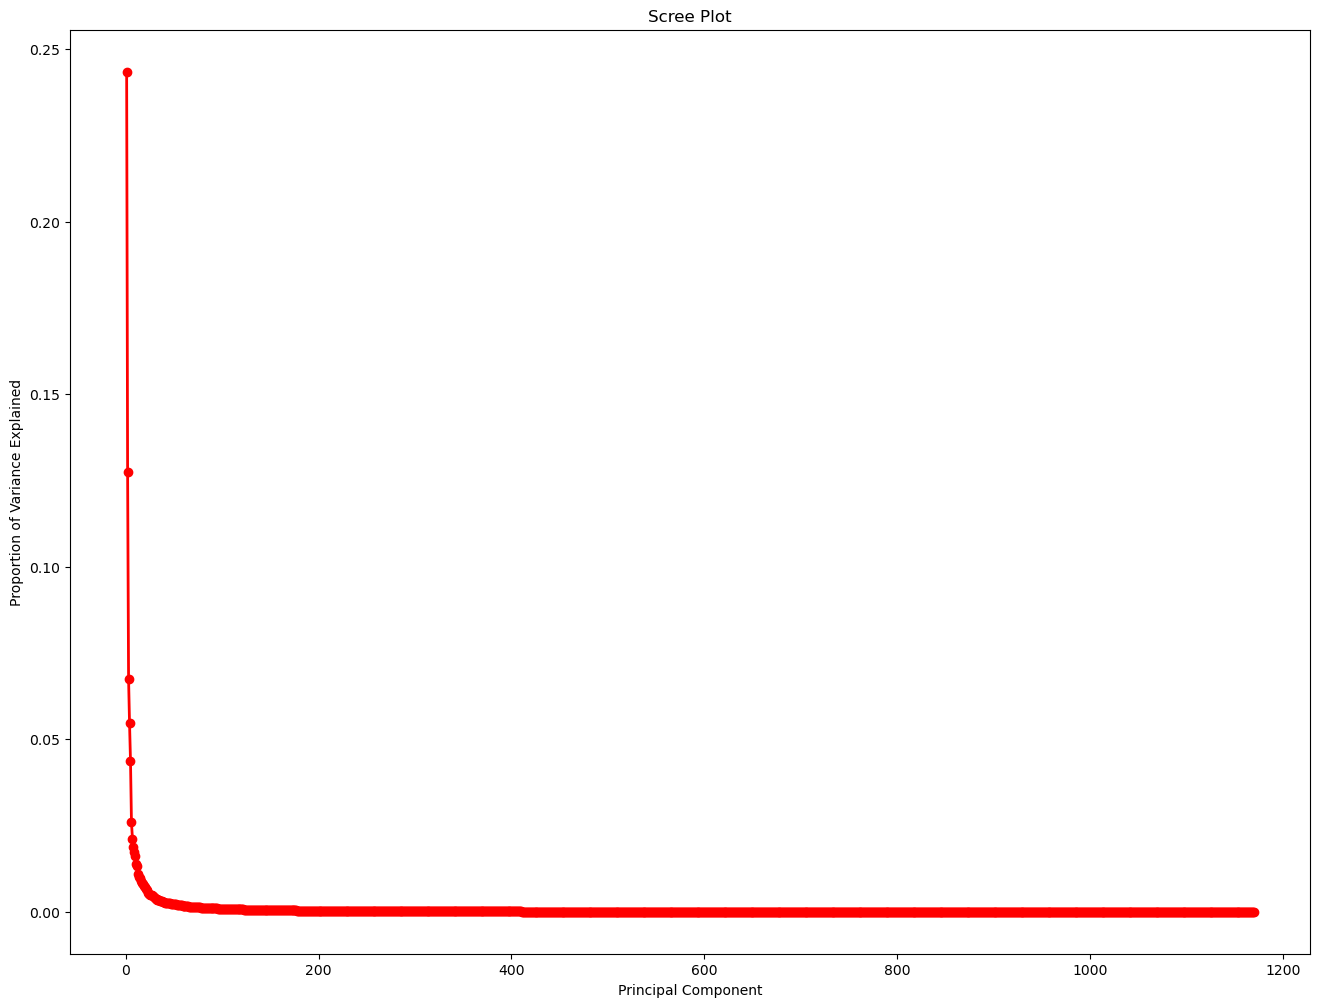

In [23]:
number_of_components = np.arange(pca.n_components_) + 1

plt.figure(figsize=(16, 12))
plt.plot(number_of_components, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Na poniższym wykresie już dokładnie widać, że optymalną wymiarowością jest 7 wymiarów, ponieważ już dla 8 wymiarów i więcej wykres staje się coraz bardziej płaski (poziomy), a największe przegięcie znajduje się przed 7.

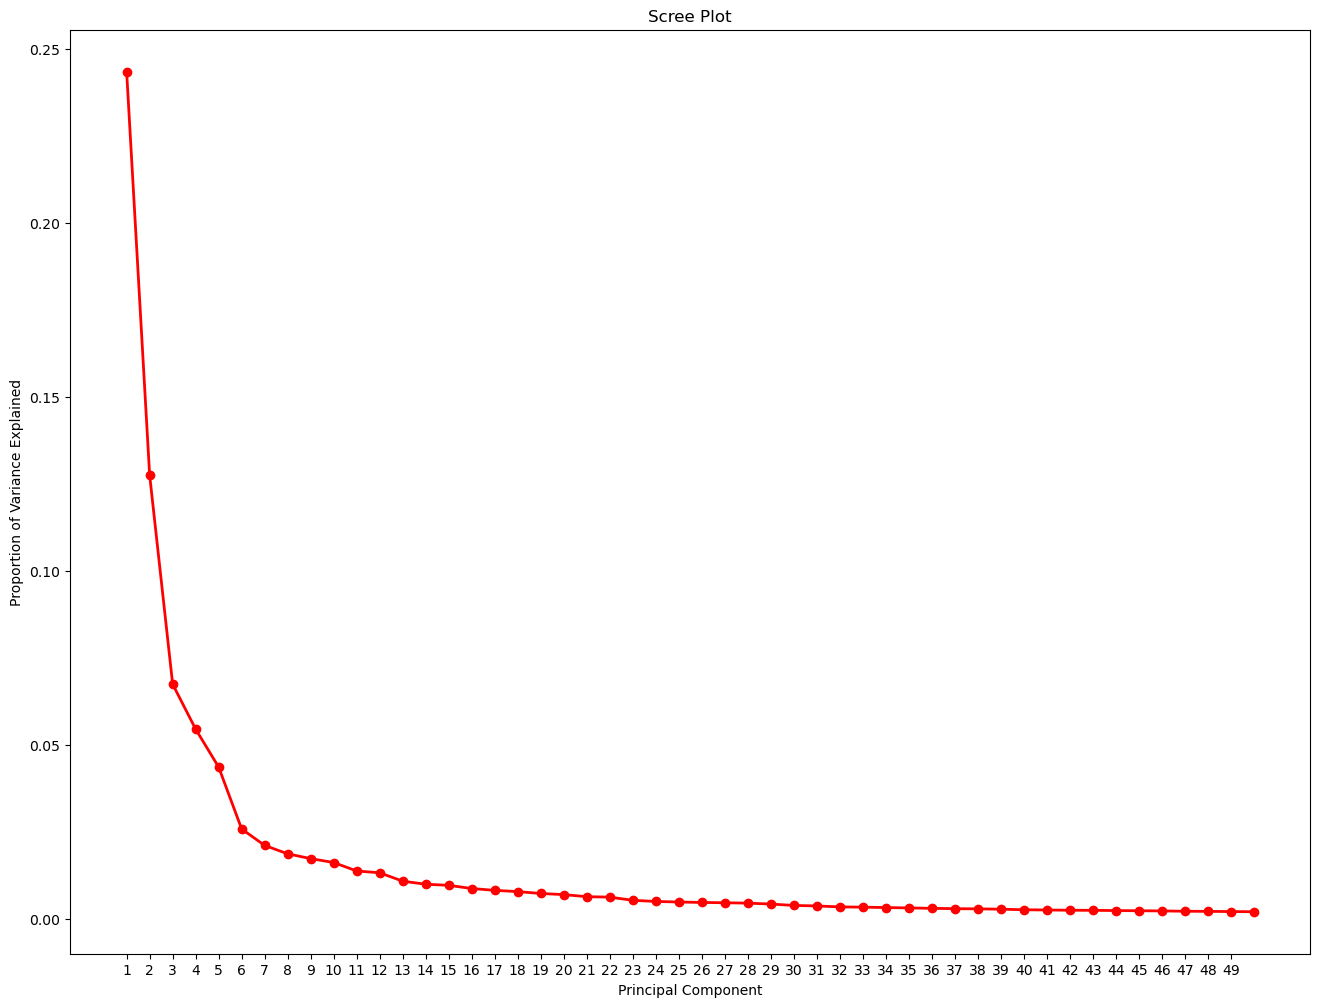

In [26]:
limit = 50

plt.figure(figsize=(16, 12))
plt.plot(number_of_components[:limit], pca.explained_variance_ratio_[:limit], 'ro-', linewidth=2)
plt.xticks(np.arange(1, limit))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

## 20 pierwszych komponentów głównych

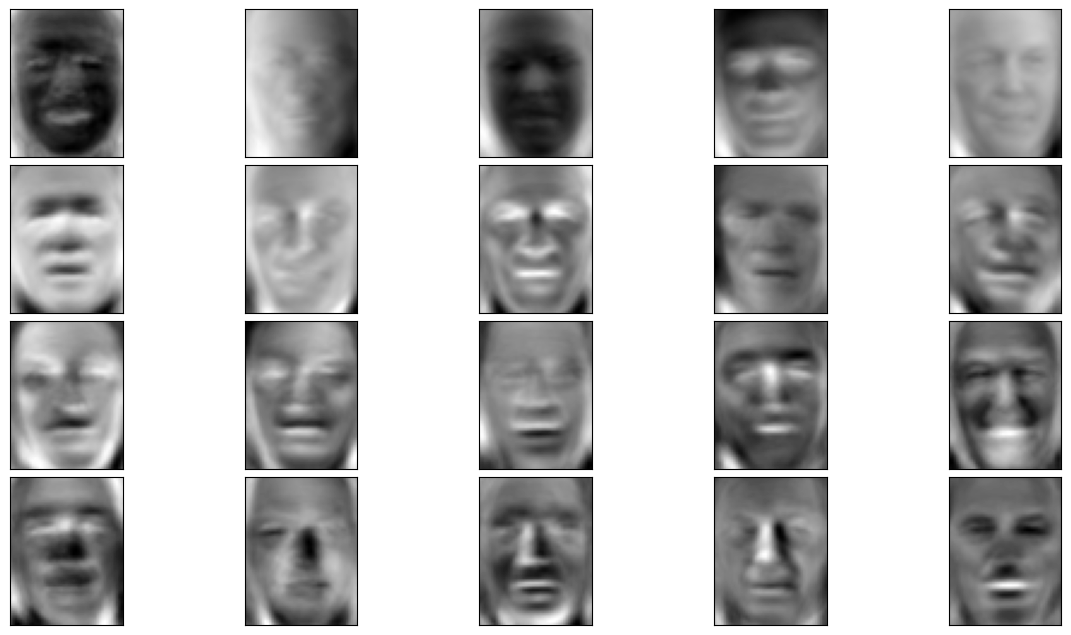

In [33]:
X = lfw_people.data
X_scaled = StandardScaler().fit_transform(X)

n_components = 20
pca = PCA(n_components=n_components).fit(X)

n_samples, h, w = lfw_people.images.shape
eigenfaces = pca.components_.reshape((n_components, h, w))

fig, axes = plt.subplots(
    4, 5, figsize=(15, 8),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.05, wspace=0.05)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')

plt.show()

#### W jaki sposób można zinterpretować działanie eigenfaces w kontekście redukcji wymiarowości wcześniej nie widzianego zdjęcia (przykładu testowego)?

Działanie *eigenfaces* w kontekście redukcji wymiarowości można zinterpretować jako ekstrakcję najbardziej istotnych cech z obrazka, pozwalających na rozpoznanie twarzy. Taka ekstrakcja cech ma szereg zalet, tj. zmniejszenie rozmiaru zdjęcia (oryginalne zdjęcie może mieć wiele wymiarów - pikseli), szybsze działanie algorytmów uczenia maszynowego, przy czym istnieje możliwość klasyfikacji, czy nawet rekonstrukcji obrazu.

#### Jakie cechy ekstrahują poszczególe eigenfaces?

- Pierwsze eigenfaces zwykle reprezentują najbardziej ogólne różnice między twarzami, takie jak orientacja i rozmiar twarzy, oświetlenie.
- Kolejne eigenfaces mogą koncentrować się na bardziej szczegółowych cechach, jak struktura oczu, nosa, ust, czy kontury twarzy.
- Im dalej, tym eigenfaces mogą wydobywać coraz subtelniejsze różnice, które jednak mogą być kluczowe do rozróżnienia bardzo podobnych do siebie twarzy.